# HomeWork 6

**DeadLine : 12:00 PM 12 Aban 1399**

**Total points : 125 pts**


Import some prerequisites

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Run this cell for plotting

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell for change polar to cartesian.

In [3]:
def pol_to_car(rho, theta):
    '''
    Changes rho and theta of a line to two point of that line.
    
    Parameters:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.
    
    Returns:
        (tuple): tuple of two point of line.
    '''
    
    a = np.cos(theta)
    b = np.sin(theta)
    c = 1000
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + c * (-b))
    y1 = int(y0 + c * (a))
    x2 = int(x0 - c * (-b))
    y2 = int(y0 - c * (a))
    return x1, y1, x2, y2

# PART 4A

**Point : 15 pts**

Here is for your helper functions(optional)

Implement this function to detect and remove circles in the given image.

In [4]:
def remove_circles(image):
    '''
    Returns the image which circles have been removed.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()
    
    #Write your code here
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=150, param2=10, minRadius=15, maxRadius=40)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(out_img, (x,y), r+2, (0,0,0), -1)
    
    return out_img

Test your implementation (dont change this cell)

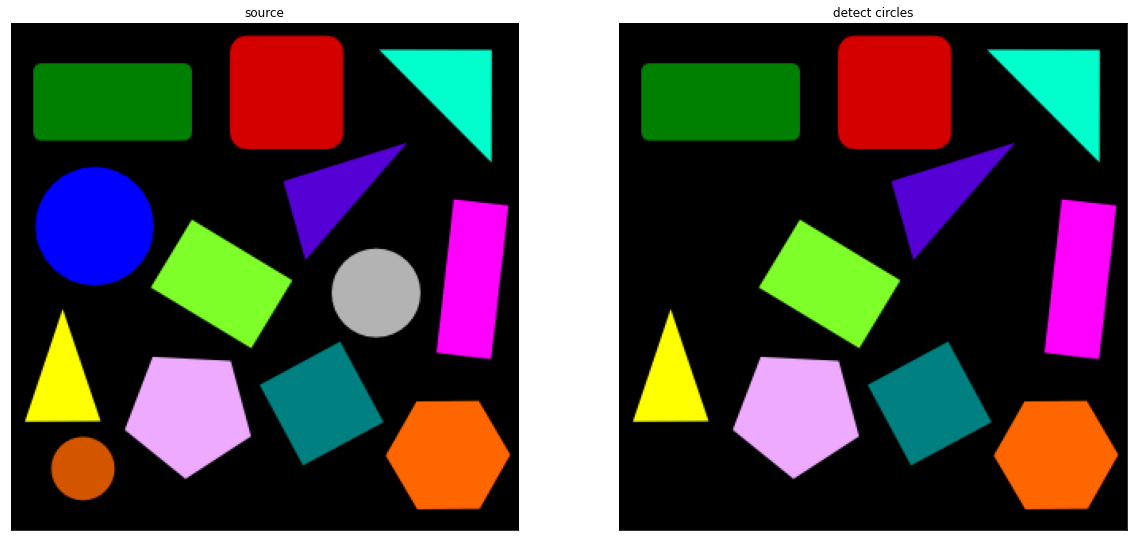

In [5]:
image_list = []

image = cv2.imread(os.path.join('images', '1.png'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = remove_circles(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect circles', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4a')

# PART 4B

**Point : 15 pts**

Implement this function to detect lines in the given image with hough algorithm.

In [6]:
def detect_lines_hough(image):
    '''
    Returns the image which lines have been detected.
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()
    
    #Write your code here
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 30, 50)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=1)
    if lines is not None:
        for i in range(0, len(lines)):
            for x1,y1,x2,y2 in lines[i]:
                cv2.line(out_img, (x1, y1), (x2, y2), (255,255,255), 2)
            
    return out_img

Test your implementation (dont change this cell)

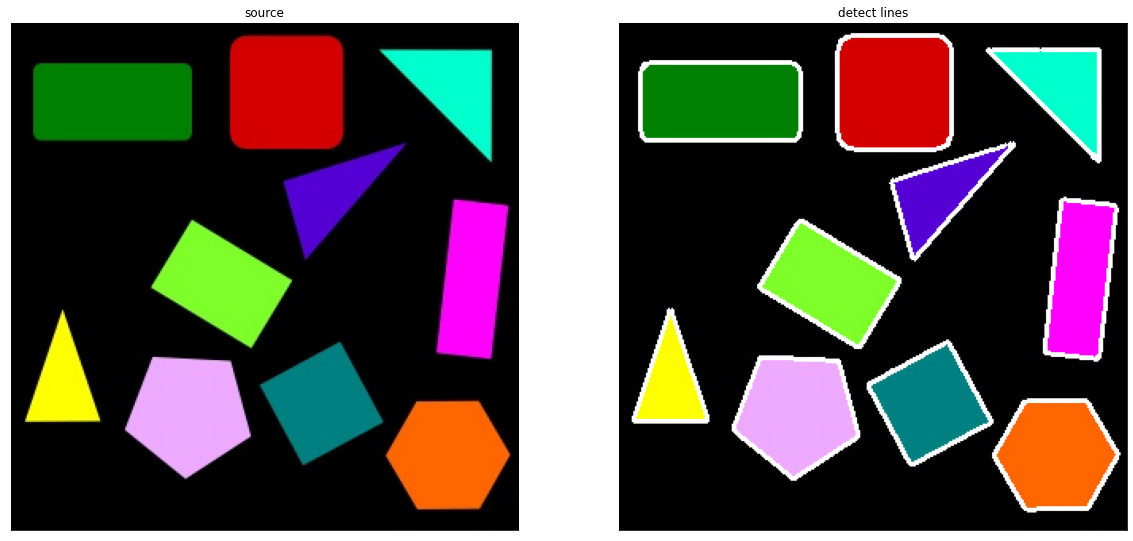

In [7]:
image_list = []

image = cv2.imread(os.path.join('images', '1b.png'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_lines_hough(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

# PART 5

**Point : 25 pts**

Here is for your helper functions(optional)

In [8]:
import random
from statistics import mean
from numpy.linalg import norm
import math
import operator 

white_pixels = []
def non_zero_pixel(image):
    for i in range (0, image.shape[0]):
        for j in range(0, image.shape[1]):
            if image[i][j] == 255:
                coordinate = i, j 
                white_pixels.append(coordinate)
                
    return white_pixels

def random_points(white_pixels):
    point1, point2 = random.sample(white_pixels, 2)
    
    return point1, point2

def distance(point1, point2, white_pixels):
    count = 0
    inlier_points = []
    
    for i in  range(0, len(white_pixels)):
        point3 = white_pixels[i]
        dist = norm(np.cross(tuple(map(operator.sub, point2, point1)), tuple(map(operator.sub, point1, point3)))) / norm(tuple(map(operator.sub, point2, point1)))
        if dist < 20: 
            inlier_points.append(point3)
            count += 1
    return count, inlier_points

def car_to_pol(inlier_points):
    x = []
    y = []
    for i in range(0, len(inlier_points)):
        x.append(inlier_points[i][0])
        y.append(inlier_points[i][1])
    x2_bar = mean(np.power(x, 2))
    y2_bar = mean(np.power(y, 2))
    x_bar = mean(x)
    y_bar = mean(y)
    xy_bar = mean(a * b for a, b in zip(x, y))
    theta = 1/2 * np.arctan(2 * ((xy_bar - (x_bar * y_bar)) / (x2_bar - y2_bar - (x_bar**2) + (y_bar**2))))
    rho = (x_bar * np.cos(theta)) + (y_bar * np.sin(theta))
    
    return rho, theta

Implement RANSAC function here.

In [9]:
def ransac(image):
    '''
    Gets input image and return rho and theta of line detected. 
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.
    '''

    img = image.copy()
    rho, theta = 0, 0

    #Write your code here
    white_pixels = non_zero_pixel(img)
    point1, point2 = random_points(white_pixels) 
    count, inlier_points = distance(point1, point2, white_pixels)
    rho, theta = car_to_pol(inlier_points)

    return rho, theta

Test your implementation (dont change this cell)

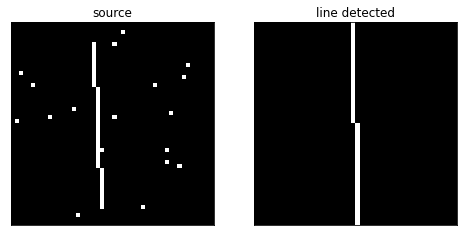

In [10]:
image_list = []
image = cv2.imread(os.path.join('images', '2.bmp'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source', 'img'])
rho, theta = ransac(image)
# print(rho, theta)
x1, y1, x2, y2 = pol_to_car(rho, theta)
# print(x1, y1, x2, y2)
image_res = np.zeros_like(image)
cv2.line(image_res, (x1, y1), (x2, y2), (255), 1)
image_list.append([image_res, 'line detected', 'img'])
plotter(image_list, 1, 2, True, 8, 6, 'q5')

# PART 6

**Point : 25pts**

Here is for your helper functions(optional)

Implement this function for return rho and theat of line detected and hough transform image.

In [11]:
def hough_transform_line(image):
    '''
    Returns rho and theat of line detected and hough transform image.
    
    Parameters:
        image (numpy.ndarray): The input image.
        
    Returns:
        rho (float): Angle from origin to the line.
        theta (float): The distance from the origin to the line.
        hough_transform (numpy.ndarray): Hough transform image.
    '''

    img = image.copy()
    rho, theta = 0, 0

    #Write your code here
    edges = []
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            if img[i][j] == 255:
                edge = i, j
                edges.append(edge)
    diameter = int(img.shape[0] * np.sqrt(2))
    hough_transform = np.zeros((2*diameter, 180))
    for i in range(0, len(edges)):
        for theta in range(0, 180):
            radian = np.deg2rad(theta -90)
            rho = int(edges[i][0] * np.cos(radian) + edges[i][1] * np.sin(radian))
            hough_transform[rho][theta] += 1
    rho, theta = np.unravel_index(np.argmax(hough_transform, axis=None), hough_transform.shape)
    return rho, theta, hough_transform

Test your implementation (dont change this cell)

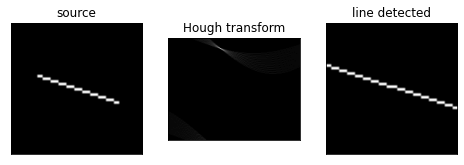

In [12]:
image_list = []
image = cv2.imread(os.path.join('images', '3.bmp'), cv2.IMREAD_GRAYSCALE)
image_list.append([image, 'source', 'img'])
rho, theta, hough_transform = hough_transform_line(image)
x1, y1, x2, y2 = pol_to_car(rho, theta)
image_list.append([hough_transform, 'Hough transform', 'img'])
image_res = np.zeros_like(image)
cv2.line(image_res, (x1, y1), (x2, y2), (255), 1)
image_list.append([image_res, 'line detected', 'img'])
plotter(image_list, 1, 3, True, 8, 6, 'q6')

for create proper files for sending in quera run this cell.

In [13]:
!python notebook_converter.py

End!!!